In [117]:
import numpy as np
import matplotlib.pyplot as mpl
import time as t

In [118]:
n = 101
h = .1
loops = 10000
xmax = (n - 1) * h
delta = 1e-3

# often = loops / 10
printing = loops / 5
prints = [10, 100, 500, 1000, 9999]

varf = np.zeros(n)

In [119]:
def line(xmax: float) -> object:
    """
    Esta función genera lel array f

    Parameters
    ----------
    xmax : float
        DESCRIPTION. Este parametro res el tamaño máximo 
        de la barra en la que vas a medir el campo

    Returns
    -------
    object
        DESCRIPTION.

    """
    f = np.zeros(n)
    for j in range(n):
        x = h * j
        f[j] = x / xmax
    return f

f = line(xmax)

In [120]:
def exact(xmax):
    fexact = np.zeros(n)
    for j in range(n):
        x = h * j
        fexact[j] = np.tanh(x)
    return fexact

fexact=exact(xmax)

In [121]:
def sden(i):
    if i==0:
        df0 = (f[i+1]-f[i])/h
    elif i == n-1:
        df0 = (f[i]-f[i-1])/h
    else:
        df0 = (f[i+1]-f[i-1])/(2.*h)
    f0 =f[i]
    den0=(.5*df0**2+.5*(1.-f0**2)**2)*h
    return den0

In [122]:
energy=0.0
for i in range(n):
    energy=energy+sden(i)

 # Funcion 1
 Calcula la variación que después se aplica sobre la función densidad de energía

In [123]:
def var_phi(ix):
    f0=f[ix]
    # df0=(f[ix+1]-f[ix-1])/(2.0*h)
    d2f0=(f[ix+1]-2.*f0+f[ix-1])/(h**2)
    
    var0=-2.*f0*(1.-f0**2)-d2f0
    
    return var0

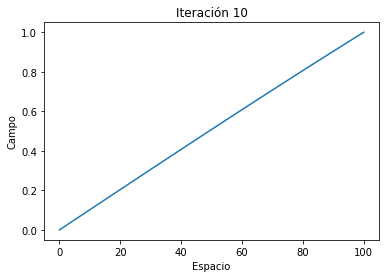

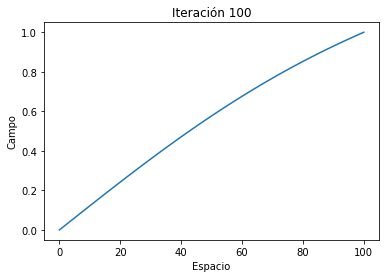

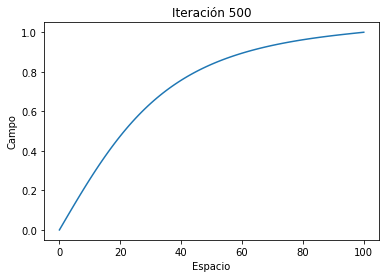

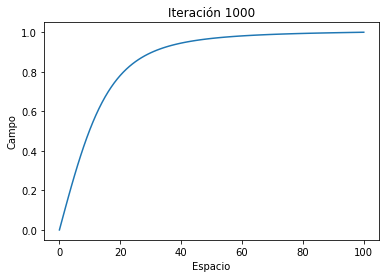

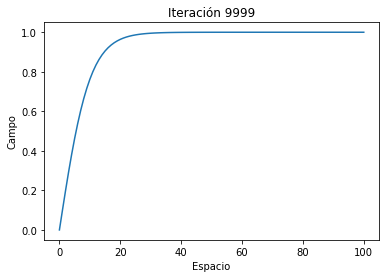

In [124]:
for loop in range(loops):
    
    # Calcular variaciones
    for j in range(1,n-1):
        varf[j] = var_phi(j)
        
    # Implementar variaciones
    for j in range(1,n-1):
        f[j]=f[j]-delta*varf[j]
        
    if loop in prints:
        mpl.title(f"Iteración {loop}")
        mpl.xlabel("Espacio")
        mpl.ylabel("Campo")
        mpl.plot(f)
        mpl.show()

In [125]:
print(printing)

2000.0
